C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2896\1612157991.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm", ax=ax)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2896\1612157991.py:115: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  gender_prefs.plot(kind="pie", subplots=True, autopct="%1.1f%%", legend=False, ax=ax, colormap="viridis")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2896\1612157991.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Alcohol Consumption"], y=df["Work Stress"], palette="Set1", ax=ax)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2896\1

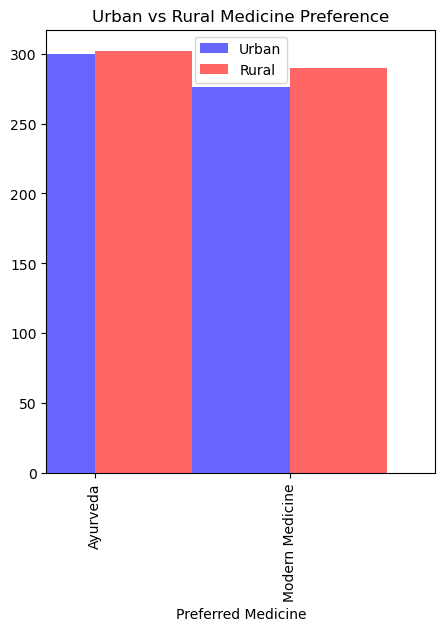

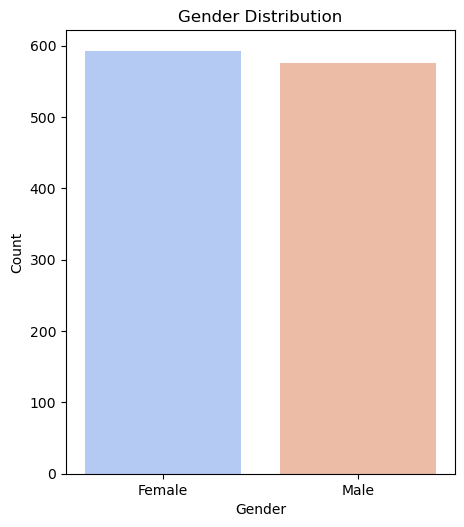

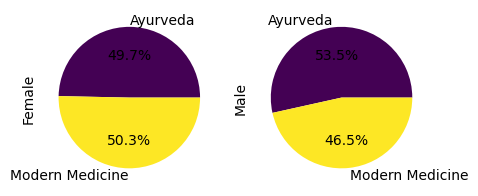

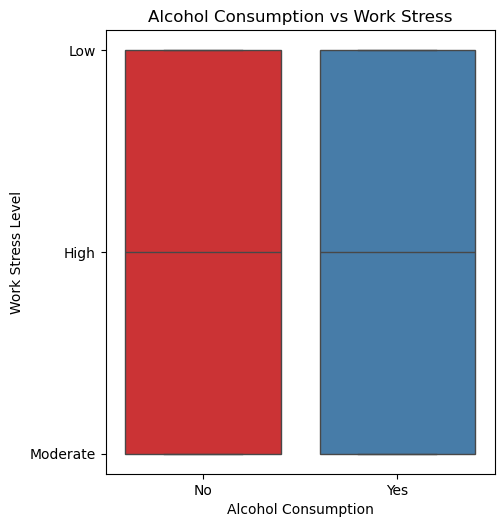

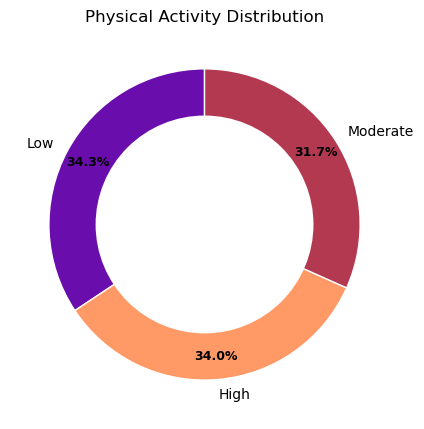

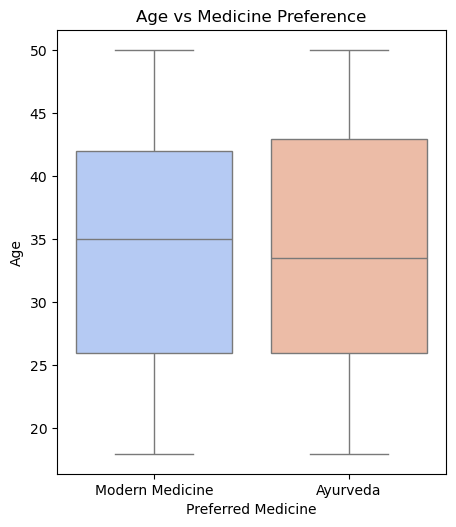

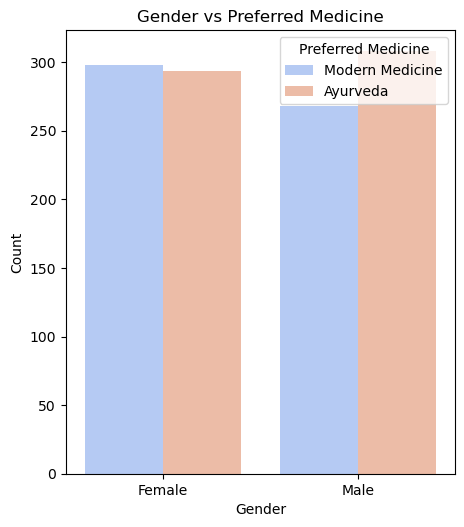

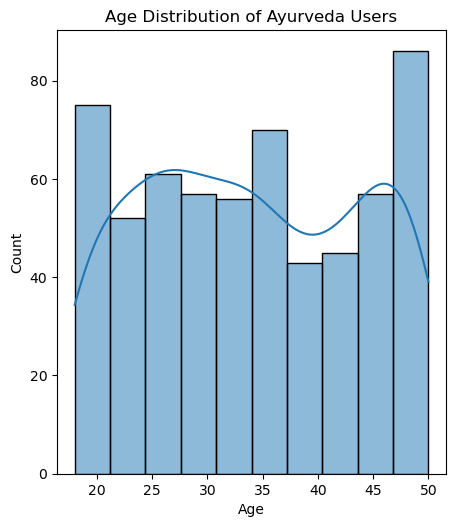

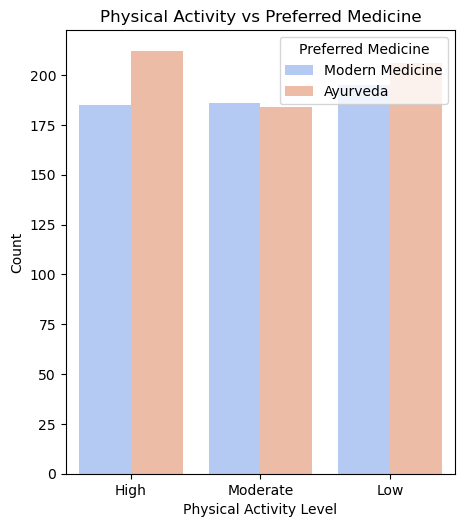

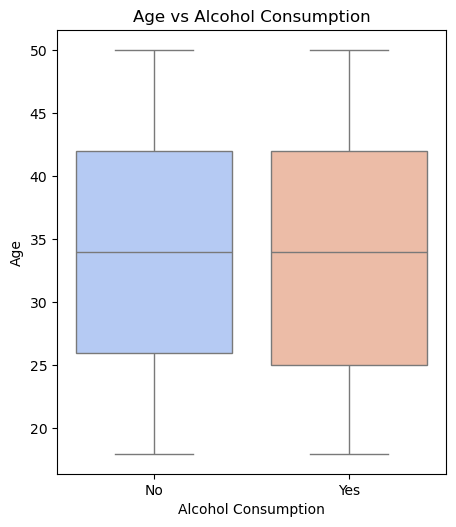

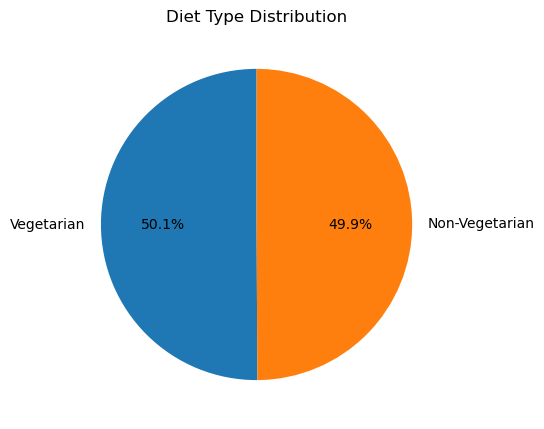

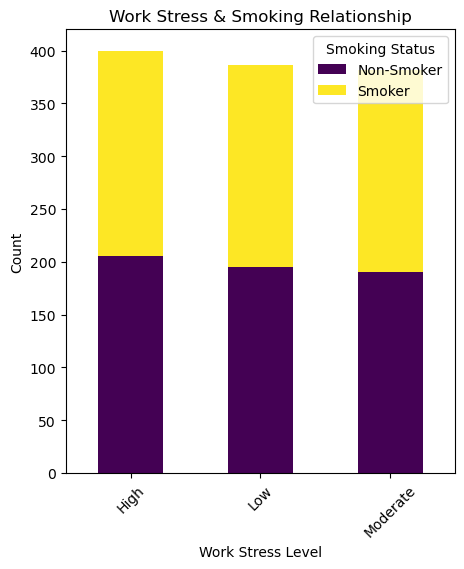

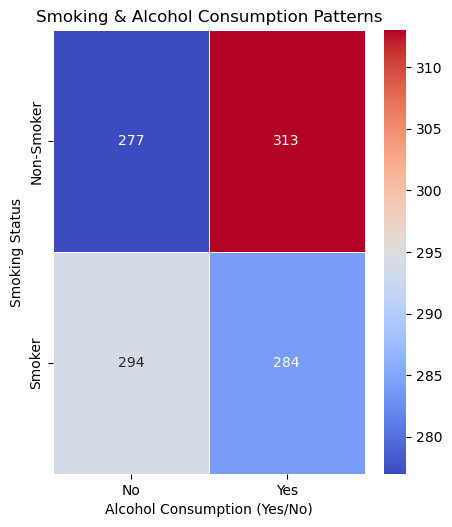

In [1]:
import pandas as pd
import tkinter as tk
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# Load dataset with error handling
file_path = "ayurveda dataset.csv"  # Update with actual dataset path
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    messagebox.showerror("Error", "Dataset file not found!")
    exit()

# Dummy login credentials
VALID_USERNAME = "admin"
VALID_PASSWORD = "123"

# Function to handle login
def login():
    username = entry_username.get()
    password = entry_password.get()
    
    if username == VALID_USERNAME and password == VALID_PASSWORD:
        messagebox.showinfo("Login Successful", "Welcome!")
        login_window.withdraw()  # Hide login window
        open_main_window()  # Open main analysis window
    else:
        messagebox.showerror("Error", "Invalid username or password")

# Function to open the main analysis window
def open_main_window():
    global root, question_listbox, result_frame

    root = tk.Toplevel(login_window)
    root.title("Ayurvedic Medicine Data Analysis")
    root.geometry("1000x600")

    # Layout (Left: Questions, Right: Output)
    frame_left = tk.Frame(root, padx=10, pady=10)
    frame_left.pack(side=tk.LEFT, fill=tk.Y)

    frame_right = tk.Frame(root, padx=10, pady=10)
    frame_right.pack(side=tk.RIGHT, expand=True, fill=tk.BOTH)

    # Listbox for questions (Left Side)
    tk.Label(frame_left, text="Select a Question:", font=("Arial", 14, "bold")).pack(pady=5)
    question_listbox = tk.Listbox(frame_left, height=10, width=50, font=("Arial", 12))
    for q in question_functions.keys():
        question_listbox.insert(tk.END, q)
    question_listbox.pack()

    # Analyze Button
    tk.Button(frame_left, text="Analyze", font=("Arial", 12, "bold"), command=analyze_question).pack(pady=10)

    # Logout Button
    tk.Button(frame_left, text="Logout", fg="red", font=("Arial", 12, "bold"), command=logout).pack(pady=5)

    # Output Frame (Right Side)
    result_frame = tk.Frame(frame_right, relief=tk.SUNKEN, borderwidth=2)
    result_frame.pack(expand=True, fill="both")

# Function to logout and return to the login page
def logout():
    root.destroy()  # Close main window
    login_window.deiconify()  # Show login page again

# Function to show results
def show_result(result):
    for widget in result_frame.winfo_children():
        widget.destroy()
    
    if isinstance(result, str):
        text_label = tk.Label(result_frame, text=result, font=("Arial", 12), wraplength=500, justify="left")
        text_label.pack(pady=10)
    elif isinstance(result, plt.Figure):
        canvas = FigureCanvasTkAgg(result, master=result_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

# Sample analysis functions
def question_1():
    avg_age = df[df['Preferred Medicine'] == 'Ayurveda']['Age'].mean()
    return f"Average Age of Ayurveda Users: {avg_age:.1f}"

def question_2():
    urban_users = df[df["Urban/Rural"] == "Urban"]["Preferred Medicine"].value_counts()
    rural_users = df[df["Urban/Rural"] == "Rural"]["Preferred Medicine"].value_counts()
    
    fig, ax = plt.subplots(figsize=(6, 4))
    urban_users.plot(kind="bar", ax=ax, color="blue", alpha=0.6, label="Urban", position=1)
    rural_users.plot(kind="bar", ax=ax, color="red", alpha=0.6, label="Rural", position=0)
    ax.set_title("Urban vs Rural Medicine Preference")
    ax.legend()
    return fig

def question_3():
    fig, ax = plt.subplots(figsize=(5, 4))
    gender_counts = df["Gender"].value_counts()
    sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm", ax=ax)
    ax.set_title("Gender Distribution")
    ax.set_xlabel("Gender")
    ax.set_ylabel("Count")
    return fig  # ✅ Return figure instead of calling show_graph()

def question_4():
    fig, ax = plt.subplots(figsize=(5, 4))

    # Create a pivot table to count gender-wise preference
    gender_prefs = df.groupby(["Preferred Medicine", "Gender"]).size().unstack()

    # Pie chart for each gender
    gender_prefs.plot(kind="pie", subplots=True, autopct="%1.1f%%", legend=False, ax=ax, colormap="viridis")

    ax.set_ylabel("")  # Hide y-label
    ax.set_title("Ayurveda vs Modern Medicine Preference (Gender-Wise)")

    return fig
  # ✅ Return figure instead of calling show_graph()

def question_5():
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(x=df["Alcohol Consumption"], y=df["Work Stress"], palette="Set1", ax=ax)
    ax.set_title("Alcohol Consumption vs Work Stress")
    ax.set_xlabel("Alcohol Consumption")
    ax.set_ylabel("Work Stress Level")
    return fig  # ✅ Return figure instead of calling show_graph()

def question_6():
    counts = df["Physical Activity"].value_counts()
    fig, ax = plt.subplots(figsize=(6, 4))

    # Define colors for better visibility
    colors = ["#6a0dad", "#ff9966", "#b33951"]  

    # Plot donut chart with better label placement
    wedges, texts, autotexts = ax.pie(
        counts, labels=counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'},
        pctdistance=0.85, textprops={'fontsize': 10}  # Adjust percentage text
    )

    # Draw center circle to make it a donut chart
    center_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    # Adjust text size and weight for better visibility
    for text in autotexts:
        text.set_fontsize(9)
        text.set_weight('bold')

    ax.set_title("Physical Activity Distribution", fontsize=12)

    return fig



def question_7():
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(x="Preferred Medicine", y="Age", data=df, palette="coolwarm", ax=ax)
    ax.set_title("Age vs Medicine Preference")
    ax.set_xlabel("Preferred Medicine")
    ax.set_ylabel("Age")
    return fig  # ✅ Return figure instead of calling show_graph()

def question_8():
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.countplot(x="Gender", hue="Preferred Medicine", data=df, palette="coolwarm", ax=ax)
    ax.set_title("Gender vs Preferred Medicine")
    ax.set_xlabel("Gender")
    ax.set_ylabel("Count")
    return fig  # ✅ Return figure instead of calling show_graph()

def question_9():
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.histplot(df[df["Preferred Medicine"] == "Ayurveda"]["Age"], bins=10, kde=True, ax=ax)
    ax.set_title("Age Distribution of Ayurveda Users")
    ax.set_xlabel("Age")
    ax.set_ylabel("Count")
    return fig  # ✅ Return figure instead of calling show_graph()

def question_10():
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.countplot(x="Physical Activity", hue="Preferred Medicine", data=df, palette="coolwarm", ax=ax)
    ax.set_title("Physical Activity vs Preferred Medicine")
    ax.set_xlabel("Physical Activity Level")
    ax.set_ylabel("Count")
    return fig  # ✅ Return figure instead of calling show_graph()

def question_11():
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(x="Alcohol Consumption", y="Age", data=df, palette="coolwarm", ax=ax)
    ax.set_title("Age vs Alcohol Consumption")
    ax.set_xlabel("Alcohol Consumption")
    ax.set_ylabel("Age")
    return fig  # ✅ Return figure instead of calling show_graph()

def question_12():
    fig, ax = plt.subplots(figsize=(5, 5))  # ✅ Create figure and axis
    diet_distribution = df["Diet Type"].value_counts()
    
    # ✅ Improved Pie Chart
    ax.pie(
        diet_distribution, 
        labels=diet_distribution.index, 
        autopct="%1.1f%%", 
        colors=plt.cm.tab10.colors,  # ✅ Better color variety
        startangle=90
    )
    
    ax.set_title("Diet Type Distribution")
    return fig  # ✅ Return figure instead of plt.show()

def question_13():
    fig, ax = plt.subplots(figsize=(6, 5))  # ✅ Create figure and axis
    
    # ✅ Grouping and plotting
    stress_smoking_relation = df.groupby("Work Stress")["Smoking Status"].value_counts().unstack()
    stress_smoking_relation.plot(
        kind="bar", stacked=True, colormap="viridis", ax=ax
    )
    
    # ✅ Better titles & labels
    ax.set_title("Work Stress & Smoking Relationship")
    ax.set_xlabel("Work Stress Level")
    ax.set_ylabel("Count")
    ax.legend(title="Smoking Status", loc="upper right")  # ✅ Adds legend for clarity
    plt.xticks(rotation=45)  # ✅ Rotates x-axis labels if needed
    return fig


def question_14():
    fig, ax = plt.subplots(figsize=(5, 4))
    
    # Create a pivot table (crosstab) to count combinations
    pivot_table = df.pivot_table(index="Smoking Status", columns="Alcohol Consumption", aggfunc="size", fill_value=0)
    
    # Create heatmap
    sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, ax=ax)

    ax.set_title("Smoking & Alcohol Consumption Patterns")
    ax.set_xlabel("Alcohol Consumption (Yes/No)")
    ax.set_ylabel("Smoking Status")

    return fig

def question_15():
     vegetarian_count = df[df['Diet Type'].fillna('').str.strip().str.lower() == 'vegetarian'].shape[0]
     return f"Total number of vegetarian users: {vegetarian_count}"


    
# Define question functions
question_functions = {
    "1. Average Age of Ayurveda Users": question_1,
    "2. Urban vs Rural Preference": question_2,
    "3. What is the percentage of males and females?": question_3,
    "4. How many users prefer Ayurveda over modern medicine?": question_4,
    "5. How does alcohol consumption relate to work stress?": question_5,
    "6. What is the most common physical activity level?": question_6,
    "7. What is the correlation between age and medicine preference?": question_7,
    "8. Do females prefer Ayurveda more than males?": question_8,
    "9. What is the most common age group for Ayurveda users?": question_9,
    "10. Do high physical activity individuals prefer Ayurveda?": question_10,
    "11. How does age influence alcohol consumption?": question_11,
    "12. What is the distribution of diet types (Veg/Non-Veg)?": question_12,
    "13. What is the relationship between work stress and smoking?": question_13,
    "14.What is the most common combination of smoking status and alcohol consumption?": question_14,
    "15.What is sum of vegetarian users?": question_15
}

# Function to analyze selected question
def analyze_question():
    selected_index = question_listbox.curselection()
    if not selected_index:
        messagebox.showwarning("Warning", "Please select a question first!")
        return
    selected_question = question_listbox.get(selected_index)
    result = question_functions[selected_question]()
    show_result(result)

# Create Login Window
login_window = tk.Tk()
login_window.title("Login Page")
login_window.geometry("400x250")

# Centering window on screen
login_window.update_idletasks()
screen_width = login_window.winfo_screenwidth()
screen_height = login_window.winfo_screenheight()
x = (screen_width - 400) // 2
y = (screen_height - 250) // 2
login_window.geometry(f"+{x}+{y}")

# Frame to center login form
frame = tk.Frame(login_window)
frame.place(relx=0.5, rely=0.5, anchor="center")

# Labels and Entry Fields with Bigger Fonts
tk.Label(frame, text="Username:", font=("Arial", 14, "bold")).pack()
entry_username = tk.Entry(frame, font=("Arial", 14))
entry_username.pack()

tk.Label(frame, text="Password:", font=("Arial", 14, "bold")).pack()
entry_password = tk.Entry(frame, show="*", font=("Arial", 14))
entry_password.pack()

# Login Button
tk.Button(frame, text="Login", font=("Arial", 14, "bold"), command=login).pack(pady=10)

login_window.mainloop()
